<a href="https://colab.research.google.com/github/anisha1607/Customer_Retention_Analysis/blob/main/Telecom_Customer_Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telecom Customer Retention Insights**

It focuses on visualizing patterns and trends in customer turnover, using data exploration techniques to highlight key factors driving churn.

Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Importing the data

In [2]:
data = pd.read_csv("Customer_Churn.csv")
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Data Understanding

In [3]:
data.shape

(7043, 21)

In [4]:
# To check the consistency of datatypes and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can observe that the 'TotalCharges' column, which contains numeric values, is incorrectly formatted as an integer; it should be of type float.

Data Wrangling

In [5]:
#Datatype conversion for TotalCharges column
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
#After converting TotalCharges to a numeric format, it was found to have missing values upon analysis
missing_values = data.isnull().sum()

miss = missing_values[missing_values > 0]
for colName, val in miss.items():
  print(colName, ':', val)

TotalCharges : 11


In [7]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


On analysis of entries where TotalCharges is 0, tenure is also 0. It indicates these data points are of newly acquired customers. These customers have not had enough time to establish a usage pattern or experience issues, so its better to exclude them.

In [8]:
#Removing entries where tenure is 0 years
data = data[data['tenure'] != 0]

In [9]:
#Checking for duplicate entries
duplicate_count = data.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_count}")

Total number of duplicate rows: 0


In [10]:
#Understanding the statistics of numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Data Analysis and Visualizations

<ipython-input-11-8daacd3a9a9d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


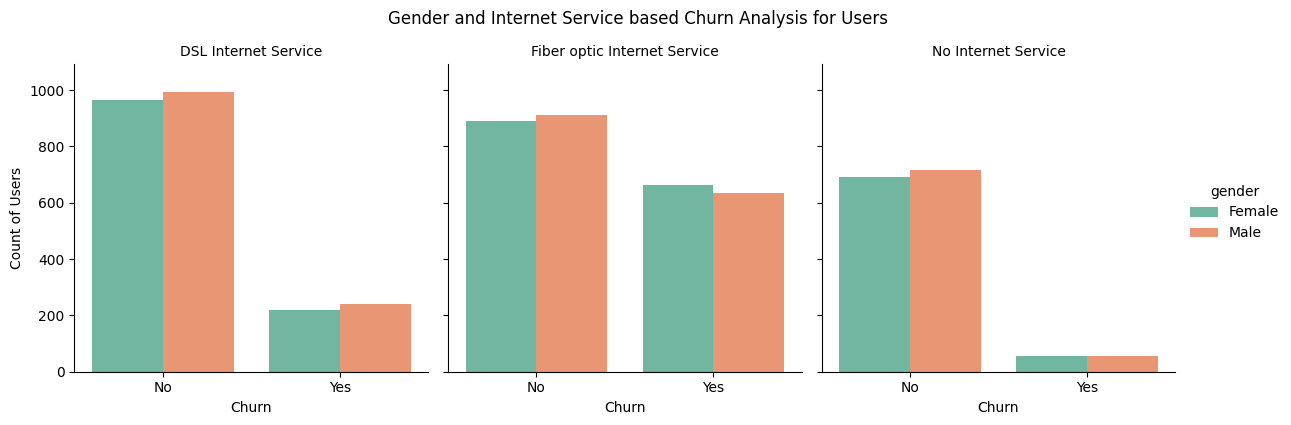

In [11]:
grouped_data = data.groupby(['gender', 'Churn', 'InternetService']).size().reset_index(name='Count')

# Set up the FacetGrid for plotting based on InternetService
g = sns.catplot(
    data=grouped_data,
    kind="bar",
    x="Churn",
    y="Count",
    hue="gender",
    col="InternetService",
    ci=None,
    height=4,
    aspect=1,
    palette="Set2"
)

# Adjust the plot
g.set_axis_labels("Churn", "Count of Users")
g.set_titles("{col_name} Internet Service")
g.fig.suptitle("Gender and Internet Service based Churn Analysis for Users", y=1.05)
g.set(ylim=(0, grouped_data['Count'].max() * 1.1))

# Show plot
plt.show()

From the graphs, it can be interpreted that Fiber Optic internet service saw the most churn with nearly an equal number of males and females. It can also be seen that users subscribed to DSL internet service had the least churn with slightly higher males than females.

In [12]:
def plot_relation(data, col1, col2):
    """
    Plots a bar chart showing the relationship between two columns in a dataset.

    Parameters:
    - data (pd.DataFrame): The dataset containing the columns.
    - col1 (str): The name of the first column which will be displayed on x-axis.
    - col2 (str): The name of the second column to group by.

    Returns:
    - A Matplotlib stacked bar chart.
    """
    if col1 not in data.columns or col2 not in data.columns:
        raise ValueError(f"Column(s) '{col1}' or '{col2}' not found in the DataFrame.")

    grouped_data = data.groupby([col1, col2]).size().unstack(fill_value=0)

    grouped_data.plot(kind='bar', stacked=True, figsize=(6, 4), rot=0, colormap="viridis")

    plt.title(f"Relationship between {col1} and {col2}")
    plt.xlabel(col1)
    plt.ylabel("Count of Users")
    plt.legend(title=col2)
    plt.tight_layout()
    plt.show()

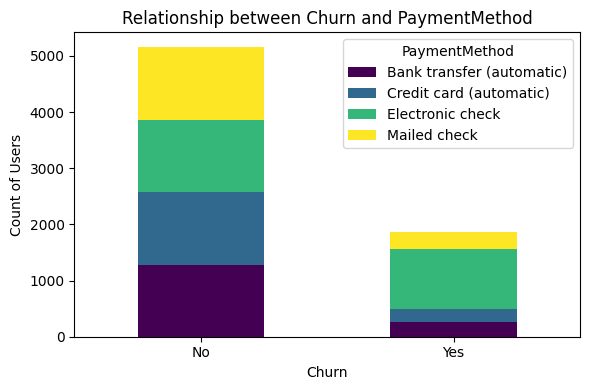

In [13]:
plot_relation(data, 'Churn', 'PaymentMethod')

Majority of customers involved in the churn utilized electronic check for payments. <br>
Customers using a credit card for payment were less likely to discontinue the service.

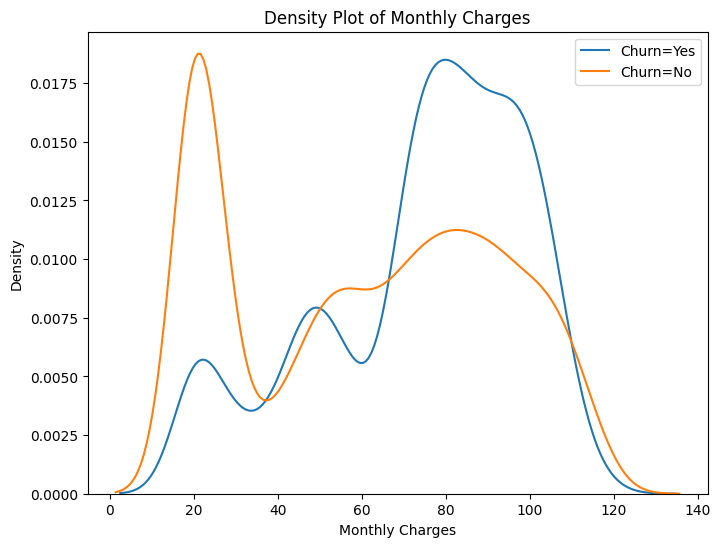

In [14]:
#To observe the density plot of monthly charges for both churn and no churn
plt.figure(figsize=(8, 6))
df = data
sns.kdeplot(data=df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn=Yes')
sns.kdeplot(data=df[df['Churn'] == 'No']['MonthlyCharges'], label='Churn=No')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Density Plot of Monthly Charges')
plt.legend()
plt.show()

Customers having a higher monthly charge in general, seem to be the ones discontinuing subscription.

Text(0.5, 1.0, 'Churn distribution by tenure')

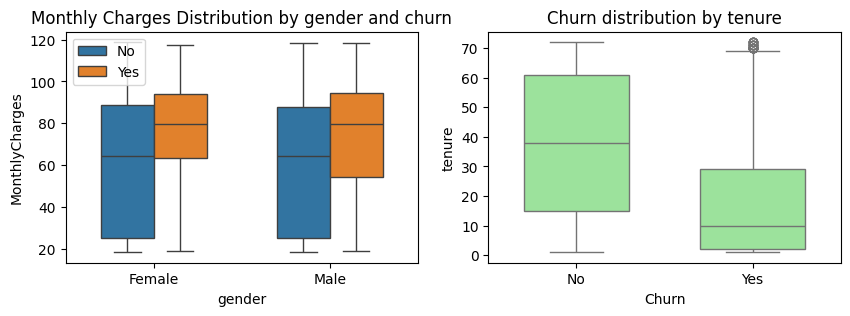

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

#To compare the spending pattern of males and females, both continuing and discontinuing
sns.boxplot(y="MonthlyCharges",x="gender",hue="Churn",data=data,width=0.6,ax=axs[0])
axs[0].legend(loc='upper left', ncol=1)
axs[0].set_title('Monthly Charges Distribution by gender and churn')

#To compare the distribution of tenures for continuing and discontinuing members
sns.boxplot(y="tenure",x="Churn",data=data,width=0.6,color='lightgreen',ax=axs[1])
axs[1].set_title('Churn distribution by tenure')

Plot1 displays the equivalence of monthly charges of both men and women, regardless of churn or not.<br>
Plot2 depicts that newer customers are more likely to discontinue the service.

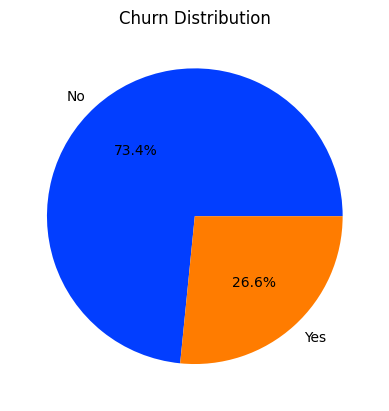

In [16]:
#analyzing churn data distribution
churn_count = data['Churn'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(churn_count, labels=churn_count.index, colors=palette_color, autopct='%.1f%%')
plt.title("Churn Distribution")
plt.show()

The distribution, with 73.4% for non-churn and 26.6% for churn, reveals a class imbalance.

In [17]:
def encode_categorical_columns(data):
    """
    Encodes the categorical columns in the Dataframe.

    Parameters:
    - data(pd.DataFrame): Pandas Dataframe which has data to be encoded

    Returns:
    - data: Dataframe with all categorical columns encoded as integers.
    """
    le = LabelEncoder()
    for column in data.select_dtypes(include='object').columns:
        data[column] = le.fit_transform(data[column])
    return data

In [18]:
#To encode categorical columns
encoded_data = encode_categorical_columns(data)

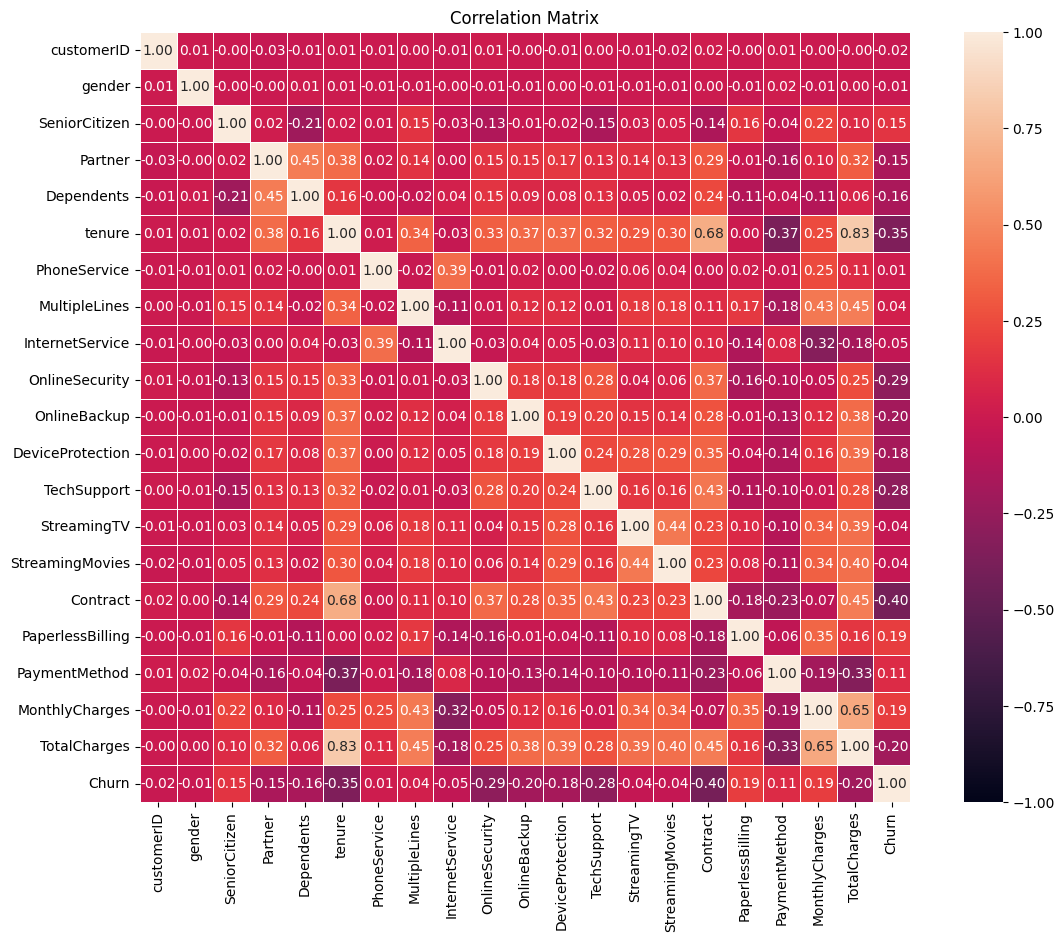

In [19]:
#To analyze the correlation among variables
plt.figure(figsize=(14, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt='0.2f', square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Inference :               


1.   Tenure and Monthly Charges show high positive correlation with Total Charges.
2.   Contract possesses considerable positive correlation with Tenure.
